In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sys
from IPython.display import display
import os # For checking if graph file exists
import pickle



pd.set_option("display.max_columns", 100)

In [2]:
PATH = 'data/'
filename_titles = 'soc-redditHyperlinks-title.tsv'
filename_bodies = 'soc-redditHyperlinks-body.tsv'
df_title = pd.read_csv(PATH + filename_titles, sep="\t")
df_body = pd.read_csv(PATH + filename_bodies, sep="\t")

In [3]:
display(df_title.head())
display(df_body.head())

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [4]:

# Example: assume you already have df_body loaded
# df_body = pd.read_csv("soc-redditHyperlinks-body.tsv", sep="\t")

# Step 1. Create the list of column names for POST_PROPERTIES
post_props_cols = [
    "num_chars", "num_chars_no_space", "frac_alpha", "frac_digits",
    "frac_upper", "frac_spaces", "frac_special", "num_words",
    "num_unique_words", "num_long_words", "avg_word_length",
    "num_unique_stopwords", "frac_stopwords", "num_sentences",
    "num_long_sentences", "avg_chars_per_sentence", "avg_words_per_sentence",
    "readability_index", "sent_pos", "sent_neg", "sent_compound",
    "LIWC_Funct", "LIWC_Pronoun", "LIWC_Ppron", "LIWC_I", "LIWC_We",
    "LIWC_You", "LIWC_SheHe", "LIWC_They", "LIWC_Ipron", "LIWC_Article",
    "LIWC_Verbs", "LIWC_AuxVb", "LIWC_Past", "LIWC_Present", "LIWC_Future",
    "LIWC_Adverbs", "LIWC_Prep", "LIWC_Conj", "LIWC_Negate", "LIWC_Quant",
    "LIWC_Numbers", "LIWC_Swear", "LIWC_Social", "LIWC_Family",
    "LIWC_Friends", "LIWC_Humans", "LIWC_Affect", "LIWC_Posemo",
    "LIWC_Negemo", "LIWC_Anx", "LIWC_Anger", "LIWC_Sad", "LIWC_CogMech",
    "LIWC_Insight", "LIWC_Cause", "LIWC_Discrep", "LIWC_Tentat",
    "LIWC_Certain", "LIWC_Inhib", "LIWC_Incl", "LIWC_Excl", "LIWC_Percept",
    "LIWC_See", "LIWC_Hear", "LIWC_Feel", "LIWC_Bio", "LIWC_Body",
    "LIWC_Health", "LIWC_Sexual", "LIWC_Ingest", "LIWC_Relativ",
    "LIWC_Motion", "LIWC_Space", "LIWC_Time", "LIWC_Work", "LIWC_Achiev",
    "LIWC_Leisure", "LIWC_Home", "LIWC_Money", "LIWC_Relig", "LIWC_Death",
    "LIWC_Assent", "LIWC_Dissent", "LIWC_Nonflu", "LIWC_Filler"
]
col_to_split = "PROPERTIES"


def split_cols(df_to_split, col_name_to_split, new_col_names):
    if col_name_to_split in df_to_split.columns:
        df_to_split[new_col_names] = df_body[col_name_to_split].str.split(",", expand=True).astype(float)
        df_to_split.drop(columns=[col_name_to_split], inplace=True)

split_cols(df_title, col_to_split, post_props_cols)
split_cols(df_body, col_to_split, post_props_cols)

# Quick check
display(df_body.head(5))
display(df_title.head(5))


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.0,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.0,0.103448,0.000000,0.0,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.0,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.0,0.017241,0.017241,0.0,0.0,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.133333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.0,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,0.052083,0.109375,0.052083,0.010417,0.046875,0.005208,0.0,0.067708,0.010417,0.0,0.000000,0.052083,0.041667,0.010417,0.010417,0.000000,0.000000,0.203125,0.046875,0.0,0.036458,0.046875,0.015625,0.005208,0.036458,0.031250,0.015625,0.010417,0.000000,0.0,0.005208,0.005208,0.0,0.0,0.0,0.104167,0.015625,0.052083,0.036458,0.026042,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamede

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,num_chars,num_chars_no_space,frac_alpha,frac_digits,frac_upper,frac_spaces,frac_special,num_words,num_unique_words,num_long_words,avg_word_length,num_unique_stopwords,frac_stopwords,num_sentences,num_long_sentences,avg_chars_per_sentence,avg_words_per_sentence,readability_index,sent_pos,sent_neg,sent_compound,LIWC_Funct,LIWC_Pronoun,LIWC_Ppron,LIWC_I,LIWC_We,LIWC_You,LIWC_SheHe,LIWC_They,LIWC_Ipron,LIWC_Article,LIWC_Verbs,LIWC_AuxVb,LIWC_Past,LIWC_Present,LIWC_Future,LIWC_Adverbs,LIWC_Prep,LIWC_Conj,LIWC_Negate,LIWC_Quant,LIWC_Numbers,LIWC_Swear,LIWC_Social,LIWC_Family,LIWC_Friends,LIWC_Humans,LIWC_Affect,LIWC_Posemo,LIWC_Negemo,LIWC_Anx,LIWC_Anger,LIWC_Sad,LIWC_CogMech,LIWC_Insight,LIWC_Cause,LIWC_Discrep,LIWC_Tentat,LIWC_Certain,LIWC_Inhib,LIWC_Incl,LIWC_Excl,LIWC_Percept,LIWC_See,LIWC_Hear,LIWC_Feel,LIWC_Bio,LIWC_Body,LIWC_Health,LIWC_Sexual,LIWC_Ingest,LIWC_Relativ,LIWC_Motion,LIWC_Space,LIWC_Time,LIWC_Work,LIWC_Achiev,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,4.789474,15.0,0.315789,1.0,1.0,345.000000,57.000000,35.577895,0.073,0.080,0.1748,0.344828,0.051724,0.034483,0.000000,0.034483,0.000000,0.000000,0.0,0.017241,0.051724,0.103448,0.051724,0.000000,0.103448,0.000000,0.034483,0.034483,0.068966,0.017241,0.034483,0.000000,0.0,0.103448,0.000000,0.0,0.000000,0.051724,0.017241,0.034483,0.000000,0.000000,0.017241,0.189655,0.034483,0.0,0.034483,0.034483,0.000000,0.000000,0.068966,0.051724,0.034483,0.034483,0.000000,0.0,0.017241,0.017241,0.0,0.0,0.0,0.068966,0.017241,0.051724,0.000000,0.051724,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,5.714286,1.0,0.071429,2.0,0.0,49.500000,7.000000,16.049286,0.472,0.000,0.5538,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.133333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.066667,0.066667,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,7.200000,0.0,0.000000,1.0,0.0,85.000000,10.000000,23.605000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,4.623037,36.0,0.366492,15.0,9.0,73.200000,12.733333,12.654154,0.153,0.026,0.9672,0.526042,0.109375,0.041667,0.031250,0.000000,0.005208,0.010417,0.0,0.067708,0.057292,0.151042,0.098958,0.015625,0.083333,0.036458,0.052083,0.109375,0.052083,0.010417,0.046875,0.005208,0.0,0.067708,0.010417,0.0,0.000000,0.052083,0.041667,0.010417,0.010417,0.000000,0.000000,0.203125,0.046875,0.0,0.036458,0.046875,0.015625,0.005208,0.036458,0.031250,0.015625,0.010417,0.000000,0.0,0.005208,0.005208,0.0,0.0,0.0,0.104167,0.015625,0.052083,0.036458,0.026042,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,fitness

In [5]:
num_unique_subreddits = df_body["SOURCE_SUBREDDIT"].nunique()
print("Unique subreddits in body dataset:", num_unique_subreddits)

Unique subreddits in body dataset: 27863


In [6]:
filename_approved_countries = 'subreddit_matches_approved.csv'
approved_countries = pd.read_csv(PATH + filename_approved_countries)
approved_countries.head(5)

,subreddit,predicted_country,status
0,australia,Australia,approved
1,bitcoinfrance,France,approved
2,india,India,approved
3,canadaguns,Canada,approved
4,mauritius,Mauritius,approved


In [7]:
def build_weighted_graph(csv_file_path):
    """
    Loads a CSV, counts hyperlink frequency between subreddits,
    calculates weights, and builds a directed graph.
    
    Weight = 100 / (number of hyperlinks from x to y)
    """
    try:
        # Load the dataframe from the CSV
        df = pd.read_csv(csv_file_path, sep="\t")
    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.", file=sys.stderr)
        print("Please make sure the CSV file is in the same directory or provide the full path.")
        return None, None
    except Exception as e:
        print(f"Error loading CSV: {e}", file=sys.stderr)
        return None, None

    # Ensure the necessary columns exist
    if 'SOURCE_SUBREDDIT' not in df.columns or 'TARGET_SUBREDDIT' not in df.columns:
        print("Error: CSV must contain 'SOURCE_SUBREDDIT' and 'TARGET_SUBREDDIT' columns.", file=sys.stderr)
        return None, None

    # Step 1: Count the occurrences of each (source, target) pair
    print("Calculating edge frequencies...")
    edge_counts = df.groupby(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).size()
    edge_counts_df = edge_counts.reset_index(name='hyperlink_count')

    # Step 2: Calculate the weight for each edge
    # Weight = 100 / hyperlink_count
    edge_counts_df['weight'] = 100.0 / edge_counts_df['hyperlink_count']

    # Step 3: Build the directed graph
    print("Building directed graph...")
    G = nx.DiGraph()
    
    # Add all nodes first (in case some nodes are only targets)
    all_nodes = set(df['SOURCE_SUBREDDIT']).union(set(df['TARGET_SUBREDDIT']))
    G.add_nodes_from(all_nodes)
    
    # Add weighted edges
    for _, row in edge_counts_df.iterrows():
        G.add_edge(row['SOURCE_SUBREDDIT'], 
                   row['TARGET_SUBREDDIT'], 
                   weight=row['weight'])
    
    print(f"Graph built successfully with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    
    # Get the set of subreddits that appear as a source
    source_subreddits = set(df['SOURCE_SUBREDDIT'])
    
    return G, source_subreddits

In [8]:
def find_all_shortest_paths(graph, source_nodes):
    """
    Runs Dijkstra's algorithm from each source node to all other nodes.
    
    Returns a dictionary: {source_node: {target_node: shortest_path_length, ...}, ...}
    """
    print(f"\nFinding shortest paths from {len(source_nodes)} source subreddits...")
    all_paths = {}

    for i, source in enumerate(source_nodes):
        # Only print an update every 1000th iteration (and the very first one)
        if i % 1000 == 0:
            print(f"  ({i+1}/{len(source_nodes)}) Calculating paths from: {source}...")
        
        try:
            # nx.single_source_dijkstra_path_length runs Dijkstra
            # It returns a dictionary of {target: length}
            lengths = nx.single_source_dijkstra_path_length(graph, source, weight='weight')
            all_paths[source] = lengths
        except nx.NodeNotFound:
            print(f"  Warning: Node '{source}' not in graph. Skipping.", file=sys.stderr)
        except Exception as e:
            print(f"  Error calculating paths from '{source}': {e}", file=sys.stderr)
            
    return all_paths


In [9]:
def plot_network(graph, draw_edge_labels=False):
    """
    Plots the directed graph using matplotlib.
    Warning: This can be slow and unreadable for large graphs.
    """
    # Don't plot if the graph is empty
    if not graph or graph.number_of_nodes() == 0:
        print("Graph is empty, skipping plot.")
        return

    print("\nAttempting to plot the network graph...")
    print("This may take a moment and might be unreadable if the graph is large.")
    
    # --- CHANGED: Increased figure size for more space ---
    plt.figure(figsize=(25, 25)) # Make figure larger
    
    # Use a spring layout
    # k controls distance between nodes, iterations for layout stability
    try:
        # --- CHANGED: Increased k to spread nodes, increased iterations ---
        # k=0.6 and iterations=50 are good starting points
        pos = nx.spring_layout(graph, k=0.6, iterations=50)
    except Exception as e:
        print(f"  Could not compute spring layout, falling back to random layout. Error: {e}", file=sys.stderr)
        pos = nx.random_layout(graph)

    # Draw the graph
    nx.draw_networkx(
        graph,
        pos=pos,
        with_labels=True,
        # --- CHANGED: Decreased node and font size ---
        node_size=80,
        font_size=6,
        font_color='black',
        node_color='skyblue',
        edge_color='gray',
        alpha=0.8,
        arrows=True,
        arrowstyle='-|>',
        arrowsize=10
    )
    
    # --- NEW: Added logic to draw edge labels if requested ---
    if draw_edge_labels:
        try:
            # Create labels, formatted to one decimal place
            edge_labels = {(u, v): f"{d['weight']:.1f}" 
                           for u, v, d in graph.edges(data=True) if 'weight' in d}
            nx.draw_networkx_edge_labels(
                graph,
                pos,
                edge_labels=edge_labels,
                font_size=5, # Make edge labels smaller
                font_color='red'
            )
        except Exception as e:
            print(f"  Warning: Could not draw edge labels. {e}", file=sys.stderr)
    
    plt.title("Subreddit Network Visualization", size=20)
    plt.axis('off') # Turn off the axis
    
    try:
        plt.show()
    except Exception as e:
        print(f"Error: Could not display plot. {e}", file=sys.stderr)
        print("Continuing without plot...")

In [10]:
CSV_FILENAME = PATH + filename_titles

# This is the file where the pre-computed graph will be saved/loaded
GRAPH_FILENAME = "subreddit_graph.gpickle"

COUNTRY_CSV_FILENAME = PATH + "subreddit_matches_approved.csv"






In [11]:
# Run this cell to recompute graph
#if os.path.exists(GRAPH_FILENAME):
#    try:
#        os.remove(GRAPH_FILENAME)
#        print(f"Successfully removed saved graph: '{GRAPH_FILENAME}'")
#        print("The graph will be rebuilt from CSV on the next run.")
#    except Exception as e:
#        print(f"Error removing file '{GRAPH_FILENAME}': {e}", file=sys.stderr)
#else:
#    print(f"No saved graph file to remove ('{GRAPH_FILENAME}').")

In [12]:
# Step 1: Build or load the graph *and* shortest paths
(graph, source_subreddits, all_shortest_paths) = (None, None, None) # Initialize

# Check if a pre-computed graph file exists
if os.path.exists(GRAPH_FILENAME):
    try:
        print(f"Loading pre-computed graph and paths from '{GRAPH_FILENAME}'...")
        # Load the tuple (graph, source_subreddits, all_shortest_paths)
        with open(GRAPH_FILENAME, 'rb') as f:
            (graph, source_subreddits, all_shortest_paths) = pickle.load(f)
        
        print(f"Graph and shortest paths loaded successfully.")
        print(f"Graph has {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    except Exception as e:
        print(f"Error loading data from '{GRAPH_FILENAME}': {e}", file=sys.stderr)
        print("Will attempt to rebuild from CSV.")
        (graph, source_subreddits, all_shortest_paths) = (None, None, None) # Reset on failure

# If graph or paths weren't loaded, build them from the CSV
if not graph or not source_subreddits or not all_shortest_paths:
    print(f"No pre-computed data found or loading failed. Building from '{CSV_FILENAME}'...")
    
    # Build the graph
    graph, source_subreddits = build_weighted_graph(CSV_FILENAME)
    
    # If graph build is successful, run path analysis and save
    if graph and source_subreddits:
        # --- Run shortest path analysis ---
        all_shortest_paths = find_all_shortest_paths(graph, source_subreddits)
        print("Shortest path analysis complete.")
        
        # --- Save graph AND paths together ---
        try:
            print(f"Saving new graph and paths to '{GRAPH_FILENAME}'...")
            # Save the graph, source list, and paths as a tuple
            with open(GRAPH_FILENAME, 'wb') as f:
                pickle.dump((graph, source_subreddits, all_shortest_paths), f, pickle.HIGHEST_PROTOCOL)
            print("Graph and shortest paths saved successfully.")
        except Exception as e:
            print(f"Error saving data to '{GRAPH_FILENAME}': {e}", file=sys.stderr)
    else:
        print("Graph building failed. Cannot proceed.", file=sys.stderr)
        all_shortest_paths = None

# Final check
if all_shortest_paths:
    print("\nShortest path data is ready.")
else:
    print("\nCould not load or compute shortest paths.", file=sys.stderr)


Loading pre-computed graph and paths from 'subreddit_graph.gpickle'...
Graph and shortest paths loaded successfully.
Graph has 54075 nodes and 234792 edges.

Shortest path data is ready.


Loading country subreddit list from 'data/subreddit_matches_approved.csv'...
Building aggregated country-level graph...
Built country graph with 107 nodes (countries) and 486 edges.

Attempting to plot the network graph...
This may take a moment and might be unreadable if the graph is large.


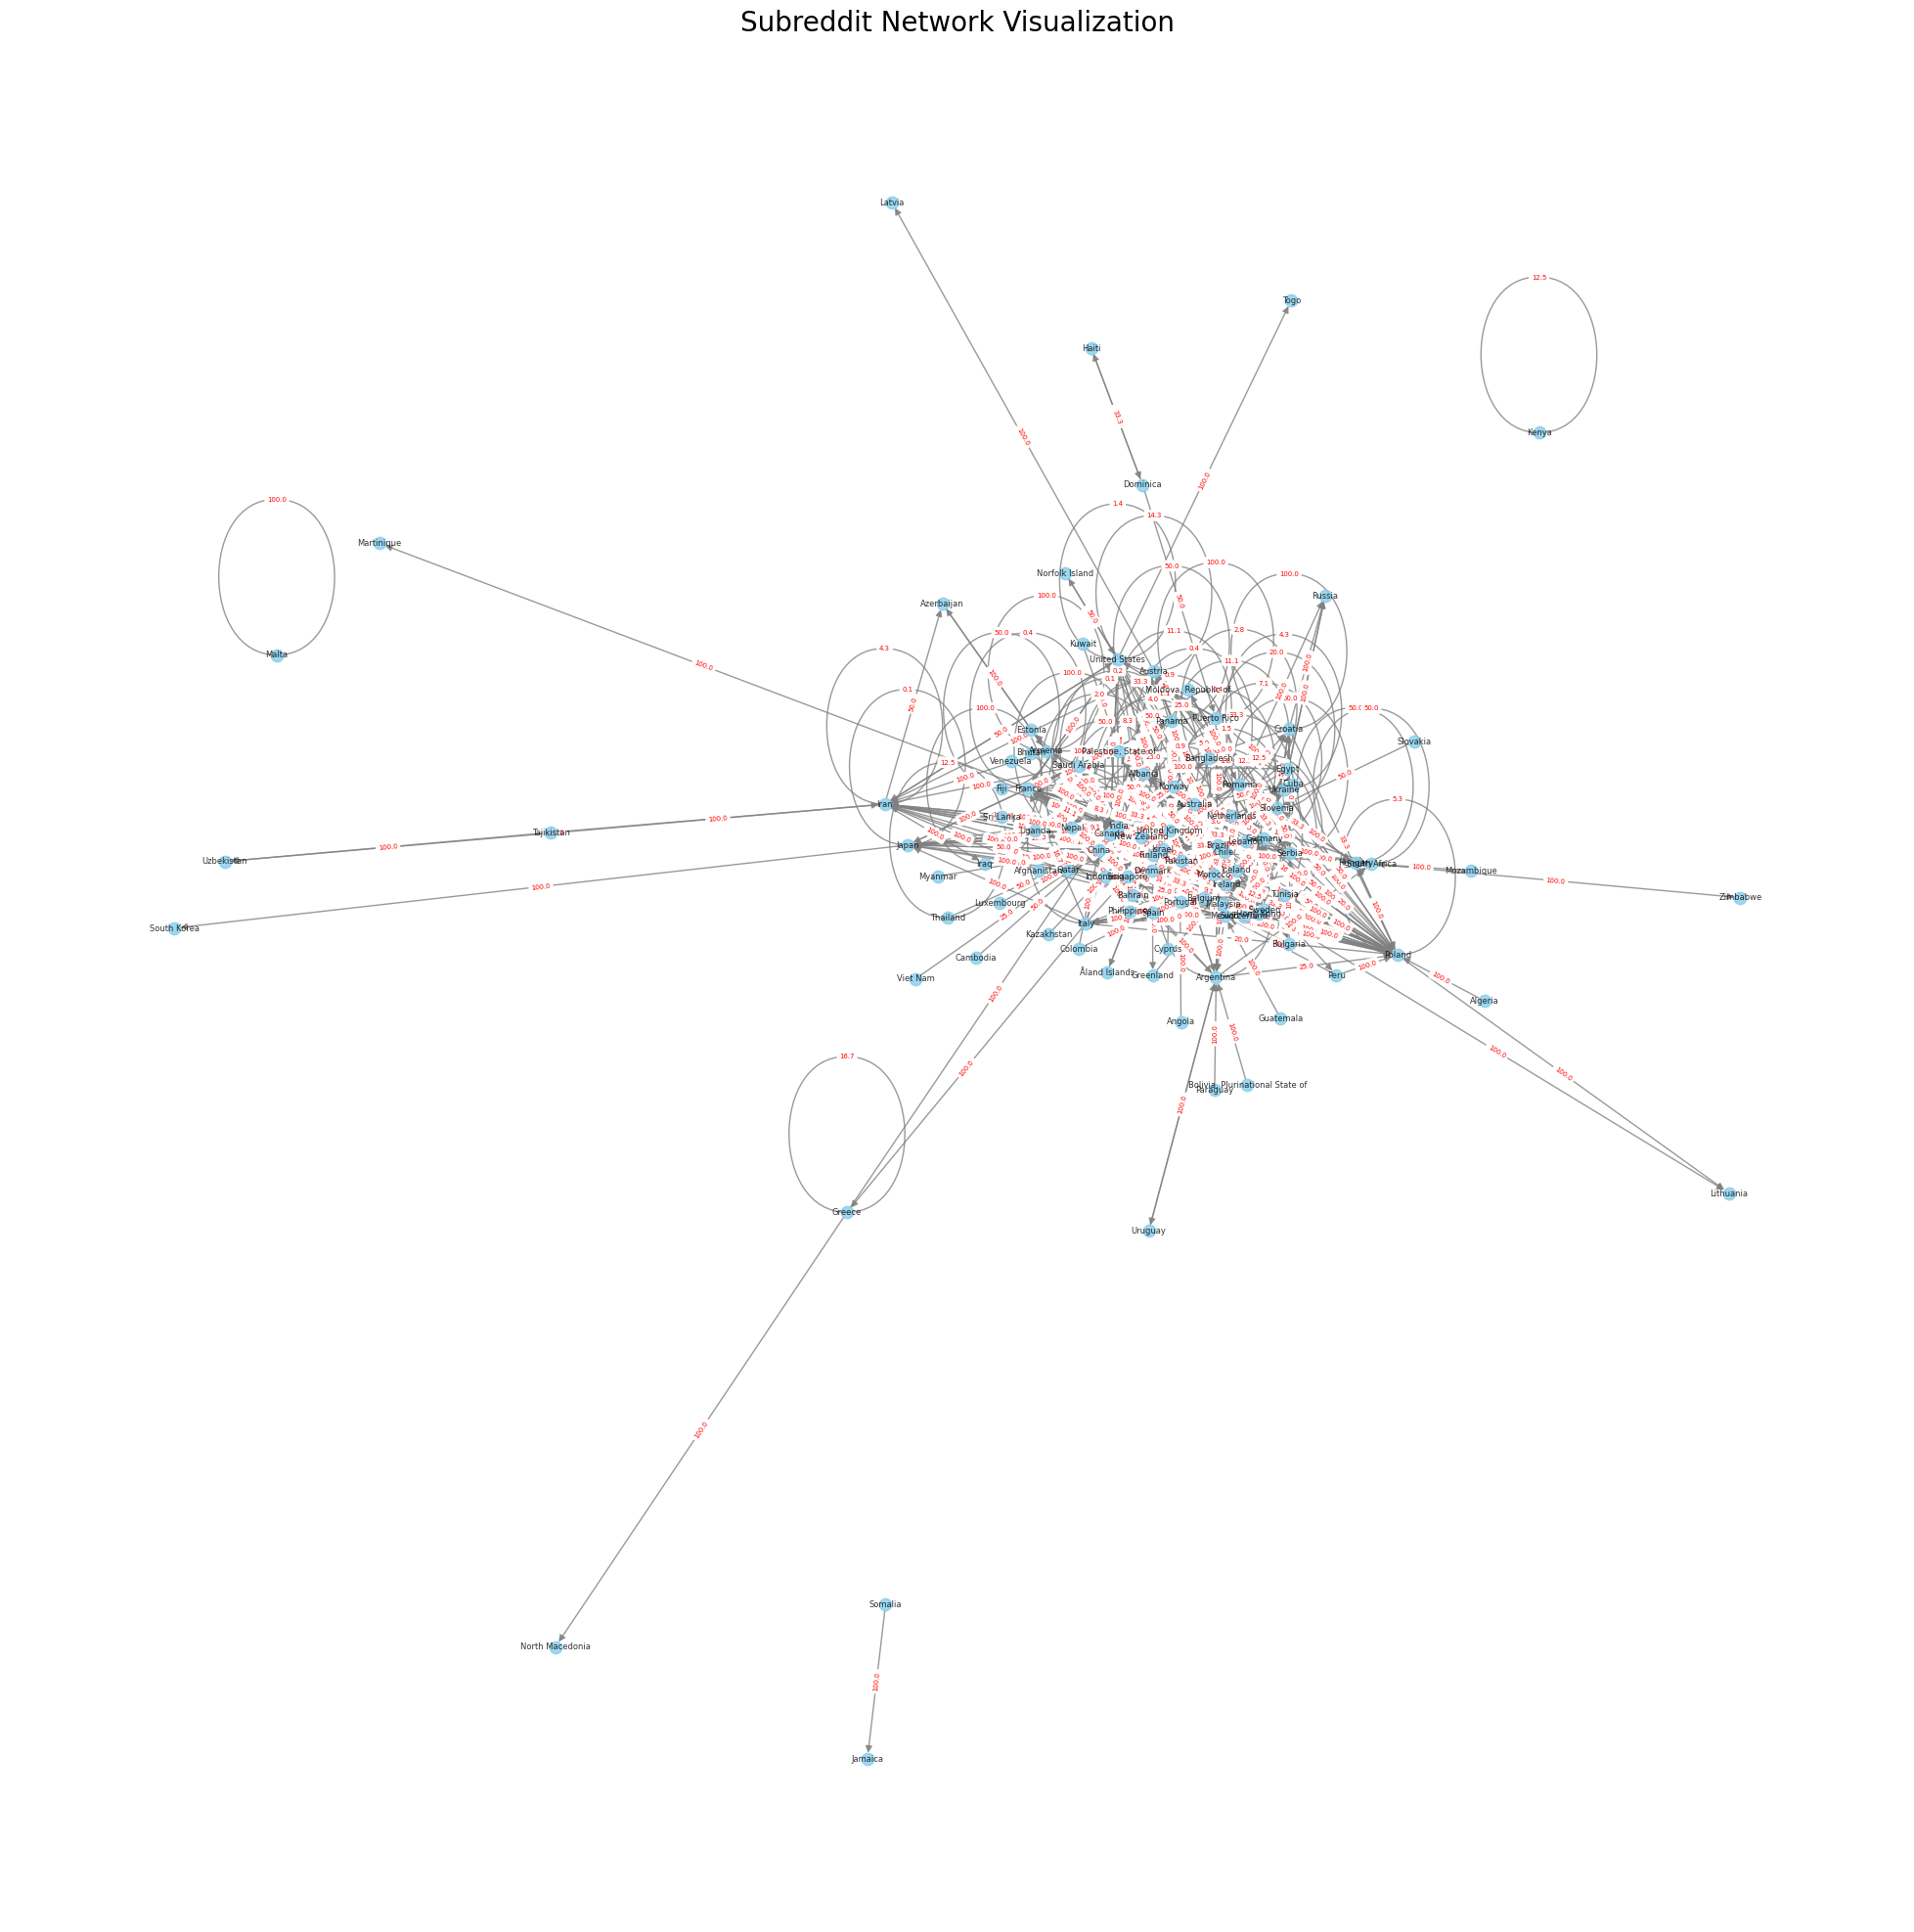

In [13]:
if graph:
    print(f"Loading country subreddit list from '{COUNTRY_CSV_FILENAME}'...")
    try:
        # Load the approved countries CSV
        df_approved_countries = pd.read_csv(COUNTRY_CSV_FILENAME)
        
        # Check for the required columns
        if 'subreddit' not in df_approved_countries.columns or 'predicted_country' not in df_approved_countries.columns:
            print(f"Error: Country CSV '{COUNTRY_CSV_FILENAME}' must contain 'subreddit' and 'predicted_country' columns.", file=sys.stderr)
            print("Skipping plot.")
        else:
            print("Building aggregated country-level graph...")
            
            # Create a subreddit-to-country mapping dictionary
            sub_to_country = pd.Series(df_approved_countries.predicted_country.values, 
                                       index=df_approved_countries.subreddit).to_dict()

            # This dictionary will store the total original hyperlink counts between countries
            country_edge_links = {}

            # Iterate through all edges in the original graph
            # (u, v) are (source, target) subreddits
            for u, v, data in graph.edges(data=True):
                country_u = sub_to_country.get(u)
                country_v = sub_to_country.get(v)
                
                # If both subreddits are in our country list, process this edge
                if country_u and country_v:
                    # Re-calculate the original hyperlink count from the edge weight
                    # (original weight = 100 / count) => (count = 100 / weight)
                    try:
                        original_hyperlink_count = 100.0 / data['weight']
                    except ZeroDivisionError:
                        continue # Skip if weight is 0 for some reason
                    
                    edge_pair = (country_u, country_v)
                    
                    # Add this edge's hyperlink count to the total for the country-pair
                    country_edge_links[edge_pair] = country_edge_links.get(edge_pair, 0) + original_hyperlink_count

            if not country_edge_links:
                print("No links found between subreddits that are both in the country list. Skipping plot.")
            else:
                # Now, build the new graph where nodes are countries
                G_countries = nx.DiGraph()
                
                # Get all unique country nodes
                all_country_nodes = set([pair[0] for pair in country_edge_links.keys()]).union(
                                    set([pair[1] for pair in country_edge_links.keys()]))
                G_countries.add_nodes_from(all_country_nodes)
                
                # Add the new weighted edges
                for (country_u, country_v), total_links in country_edge_links.items():
                    # Use the same weighting scheme as before
                    weight = 100.0 / total_links
                    G_countries.add_edge(country_u, country_v, weight=weight)
                    
                print(f"Built country graph with {G_countries.number_of_nodes()} nodes (countries) and {G_countries.number_of_edges()} edges.")
                
                # --- MODIFIED: Call plot_network with draw_edge_labels=True ---
                # Plot the new country graph
                plot_network(G_countries, draw_edge_labels=True)
            
    except FileNotFoundError:
        print(f"Error: The country CSV file '{COUNTRY_CSV_FILENAME}' was not found.", file=sys.stderr)
        print("Cannot plot country graph.")
    except Exception as e:
        print(f"Error loading or processing country CSV: {e}", file=sys.stderr)
        print("Skipping plot.")
else:
    print("No graph to plot.")

In [14]:
# Plot entire network
#if graph:
#    plot_network(graph)
#else:
#    print("No graph to plot.")

In [16]:
if all_shortest_paths:
    
    # --- NEW: Load country mapping ---
    print("\nLoading country subreddit list...")
    # PATH should be defined from cell 2 ('data/')
    # COUNTRY_CSV_FILENAME is defined in cell 10 ('data/subreddit_matches_approved.csv')
    try:
        df_approved_countries = pd.read_csv(COUNTRY_CSV_FILENAME)
        # Create a subreddit-to-country mapping dictionary
        sub_to_country = pd.Series(df_approved_countries.predicted_country.values, 
                                   index=df_approved_countries.subreddit).to_dict()
        print(f"Loaded {len(sub_to_country)} subreddit-to-country mappings.")
    except FileNotFoundError:
        print(f"Error: Country CSV file '{COUNTRY_CSV_FILENAME}' was not found.", file=sys.stderr)
        print("Cannot filter for country paths. Aborting.")
        sub_to_country = {} # Make it an empty dict
    except Exception as e:
        print(f"Error loading country file: {e}. Cannot filter for country paths.", file=sys.stderr)
        sub_to_country = {} # Make it an empty dict

    # --- NEW: Logic to find MINIMUM paths between countries ---
    if sub_to_country:
        output_csv = PATH + "country_shortest_paths_output.csv"
        print(f"\nFinding minimum shortest paths between countries...")
        
        # This will store { (country_u, country_v): min_length }
        country_shortest_paths = {} 
        total_sources = len(all_shortest_paths)
        
        # Iterate through the main dictionary one source subreddit at a time
        for i, (source_sub, paths) in enumerate(all_shortest_paths.items()):
            
            # Print progress
            if (i + 1) % 1000 == 0 or i == 0:
                print(f"  ... processing source subreddit {i+1}/{total_sources} ('{source_sub}')")

            # Get the source country
            country_u = sub_to_country.get(source_sub)
            
            # If this subreddit doesn't map to a country, skip all its paths
            if not country_u:
                continue
                
            # Iterate through all targets for this source
            for target_sub, length in paths.items():
                # Exclude paths from a node to itself
                if source_sub == target_sub:
                    continue
                    
                # Get the target country
                country_v = sub_to_country.get(target_sub)
                
                # If this target maps to a country, process it
                if country_v:
                    pair = (country_u, country_v)
                    
                    # Check if this path is shorter than the one we already found
                    current_min_length = country_shortest_paths.get(pair, float('inf'))
                    if length < current_min_length:
                        country_shortest_paths[pair] = length

        print("...Processing complete.")

        # --- NEW: Convert the dictionary of minimums to a DataFrame ---
        if country_shortest_paths:
            print(f"\nConverting {len(country_shortest_paths)} country-to-country paths to DataFrame...")
            
            # Convert dict to a list of tuples
            path_list = [(source, target, length) for (source, target), length in country_shortest_paths.items()]
            
            # Create DataFrame
            df_countries = pd.DataFrame(path_list, columns=['source_country', 'target_country', 'shortest_path_length'])
            
            # Sort by length for easier analysis
            df_countries.sort_values(by='shortest_path_length', inplace=True)
            
            # --- NEW: Save the new DataFrame to a new CSV file ---
            try:
                df_countries.to_csv(output_csv, index=False, encoding='utf-8')
                print(f"\nSuccessfully saved all *country* shortest paths to '{output_csv}'")
                print("\n---")
                print("To inspect the file, run this in a new cell:")
                print(f"df_country_paths = pd.read_csv('{output_csv}')")
                print("display(df_country_paths.head())")
            except Exception as e:
                print(f"\nError saving country DataFrame to CSV: {e}", file=sys.stderr)
        
        else:
            print("\nNo shortest paths found between any two mapped countries.")

else:
    print("No shortest paths were calculated.")


Loading country subreddit list...
Loaded 1397 subreddit-to-country mappings.

Finding minimum shortest paths between countries...
  ... processing source subreddit 1/43695 ('enoughideology')
  ... processing source subreddit 1000/43695 ('predators')
  ... processing source subreddit 2000/43695 ('turbografx')
  ... processing source subreddit 3000/43695 ('arduino')
  ... processing source subreddit 4000/43695 ('bustynats')
  ... processing source subreddit 5000/43695 ('trollxmovienight')
  ... processing source subreddit 6000/43695 ('paradoxplaza')
  ... processing source subreddit 7000/43695 ('vertigomasterrace')
  ... processing source subreddit 8000/43695 ('swingtrading')
  ... processing source subreddit 9000/43695 ('themlscirclejerk')
  ... processing source subreddit 10000/43695 ('themountaingoats')
  ... processing source subreddit 11000/43695 ('gwcumsluts')
  ... processing source subreddit 12000/43695 ('bartenders')
  ... processing source subreddit 13000/43695 ('theslums')
  